# Working with the MIDI data
##### Milestone 2 : Data gathering, preprocessing and basis statistics

### Data crawling, decisions and strategies

By navigating manually into the [130000 unsorted MIDI file dataset](https://www.reddit.com/r/WeAreTheMusicMakers/comments/3ajwe4/the_largest_midi_collection_on_the_internet/) that we found, there was several sub-sections and we looked for one with a structure that could give us ground for our analysis. There were many partly-unamed and unsorted data that we had to remove because we could not find anything meaningful to do with it. Apart from this there were many dataset that were contained inside the zip. There were the following:

- [AMERICANA_FOLK](http://www.pdmusic.org/)
- [Classical_Guitar](classicalguitarmidi.com)
- [Jazz](www.thejazzpage.de)
- [Metal_Rock](rock.freemidis.net)
- Arabic and Tribal Rhythms
- Chords and Circle of fifths
- TV_Themeswww.tv-timewarp.co.uk_MIDIRip
- Metal_Rock_wolverine-metalmidi.wen.ru_MIDIRip


Which were too specific for the work we are trying to achieve. Our goal was to find a set which would treat different genres while being oriented to guitar pieces because we want to combine it with Ultimate Guitar. That is the reason why we chose the [MIDKAR dataset](http://midkar.com/) , providing us material that is guitar-oriented and classified per genre.




In [77]:
# Imports
import numpy as np
import seaborn as sns
import pandas as pd
import os
import fnmatch
import glob2
import glob
from matplotlib import pyplot
import numpy as np

# Constants
DATA_FOLDER = 'Data/'

In [78]:
#Getting all the data in a DataFrame
df = pd.DataFrame(glob.glob(DATA_FOLDER + "/*/*.mid"))

#Splitting into a more readable format
df['genre'] = df[0].str.split('\\', expand=True)[1]
df['name_artist'] = df[0].str.split('\\', expand=True)[2].map(lambda x: str(x)[:-4])


display(df.head())

,0,genre,name_artist
0,Data\blues\all_blues-Miles-Davis_dz.mid,blues,all_blues-Miles-Davis_dz
1,Data\blues\between_the_sheets-isley-bros_mlod.mid,blues,between_the_sheets-isley-bros_mlod
2,Data\blues\budapest-George Ezra-kar_rt.mid,blues,budapest-George Ezra-kar_rt
3,Data\blues\dont_say_nothin_bad_about_my_baby-k...,blues,dont_say_nothin_bad_about_my_baby-kar_gr
4,Data\blues\for_your_precious_love_fd.mid,blues,for_your_precious_love_fd


One can see that the song's name and the artist's name are separate with a '-'. We must also get rid of the 

In [79]:
#Splitting and sorting
df['name'] = df['name_artist'].str.split('-', expand=True)[0]
df['artist'] = df['name_artist'].str.partition('-', expand=True)[2]
df['artist'] = df['artist'].str.split('_', expand=True)[0]


In [80]:
#Dropping the raw data (in a separate cell to avoid dropping it twice when printing and have errors)
df = df.drop([0, 'name_artist'], axis=1)

In [81]:
#Cleaning the data to get rid of songs with no artists
df['artist'] = df['artist'].replace('', np.nan).replace('kar', np.nan).str.replace("-kar", "")
display(df.head())

,genre,name,artist
0,blues,all_blues,Miles-Davis
1,blues,between_the_sheets,isley-bros
2,blues,budapest,George Ezra
3,blues,dont_say_nothin_bad_about_my_baby,NaN
4,blues,for_your_precious_love_fd,NaN


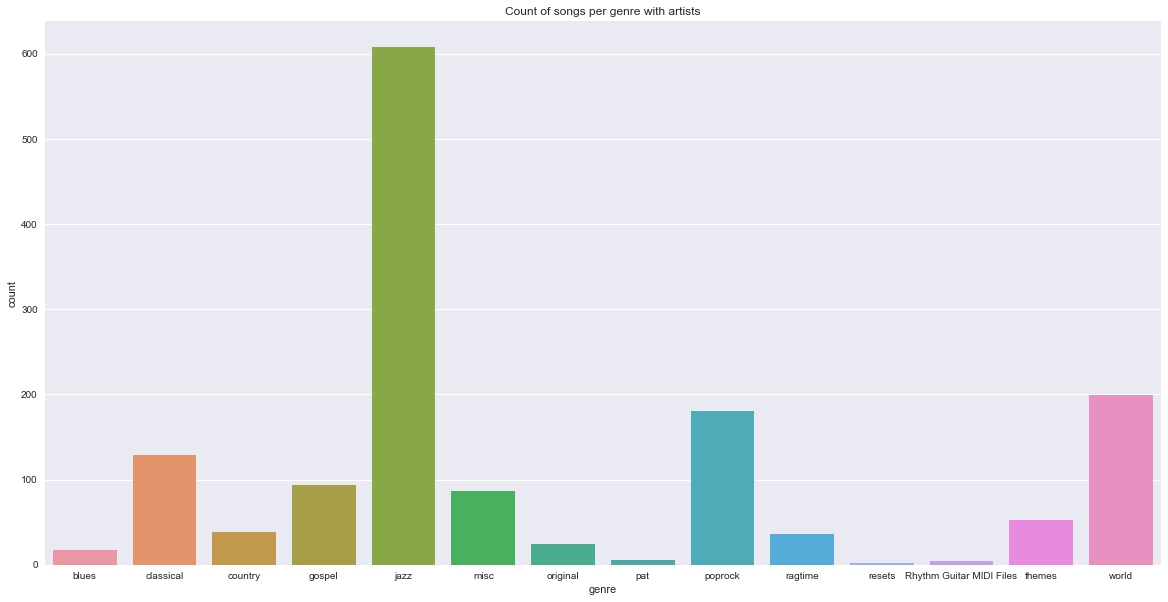

In [82]:
#Displaying the different genres
sns.set(style="darkgrid")
fig, ax1 = pyplot.subplots(figsize=(20, 10))
ax1 = sns.countplot(x="genre", data=df)
ax1.set_title('Count of songs per genre with artists')
pyplot.show()

### Comments on the repartition
The strikingly big bias toward jazz in this collection is problematic. We will have to pay attention to that when conducting the analysis and reduce the sample size from that genre with respect to others. 

When dealing with this data, we must consider the fact that many songs have no artists and this might be problematic for further analysis. Let us take a look what the data looks like if we remove the artist-less songs. In addition to this, one could argue that there would be no point to keep the "misc" category because of its chaotic nature, one will have trouble to get a genre-based interpretation from this. However if we manage to match it with some Ultimate guitar dataset, it would still be relevant to take it into account, thus why we will keep it. The same remark applies to the "original" classification.

In [83]:
#Removing songs with no artists
df2 = df.dropna()

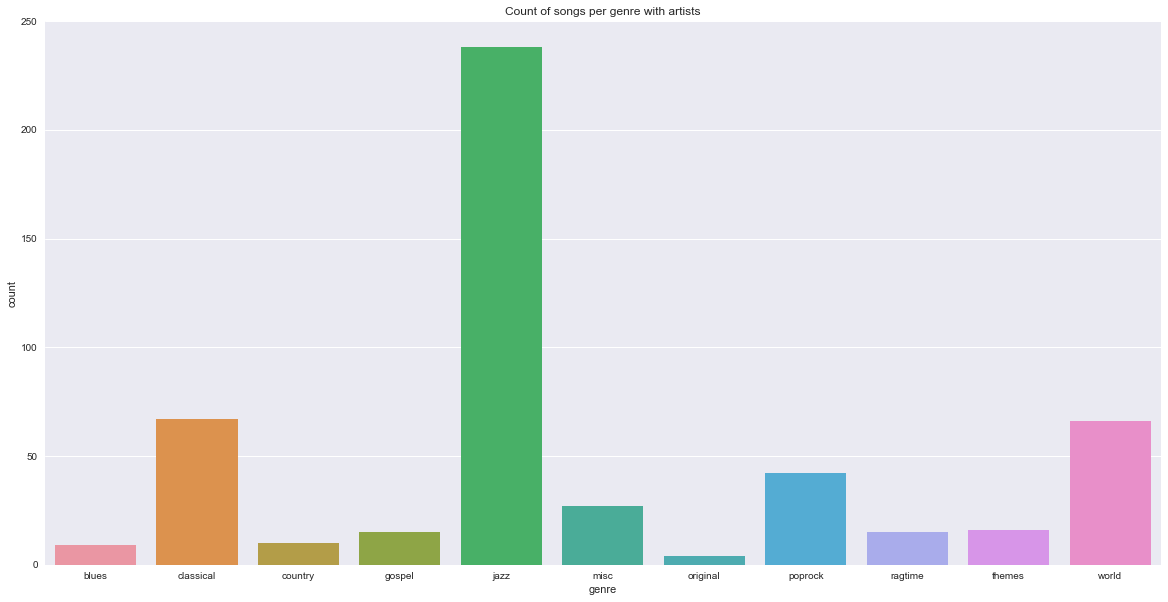

In [84]:
#Displaying the different genres
fig, ax2 = pyplot.subplots(figsize=(20, 10))
ax2 = sns.countplot(x="genre", data=df2)
ax2.set_title('Count of songs per genre with artists')
pyplot.show()

##### Comments
The representation of the different genres roughly remains the same, expect from "Resets" and "Rhythm Guitar MIDI" that disappear

#### Artist repartion
Let us take a look at this aspect of the data, meaning how artists are represented and if there are some over-representations.

In [85]:
display(df2.artist.value_counts().describe())

count    398.000000
mean       1.278894
std        0.949669
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max       10.000000
Name: artist, dtype: float64

It seems that there is no strong bias toward a particular artist, no one is present more than ten times and more than 75 percent of artists appear only once.

Let's now explore this feature per genre.

In [88]:
display(df2.groupby('genre').describe())
# Ultimate considerations regarding this dataset

artist                         name                                 \
           count unique        top freq count unique                     top   
genre                                                                          
blues          9      9   Al Green    1     9      9               all_blues   
classical     67     49    Strauss    7    67     67          into_the_night   
country       10      8        ray    3    10     10    absence_of_the_heart   
gospel        15     15    Vivaldi    1    15     15    beautiful_valley_bz2   
jazz         238    195         pt    7   238    226               take_five   
misc          27     26       1921    2    27     27            hail_chicago   
original       4      4  wj bowers    1     4      4   a weekend in paris_ah   
poprock       42     39        bz3    2    42     41  some_kind_of_wonderful   
ragtime       15     14       1921    2    15     15         in_my_home_town   
themes        16     16  50-shades    1    16     15                 charade   
world         66     56         it    5    66     65           another_woman   

                
          freq  
genre           
blues        1  
classical    1  
country      1  
gospel       1  
jazz         2  
misc         1  
original     1  
poprock      2  
ragtime      1  
themes       2  
world        2

#### Comments
One can see that there is no particular overtaking by a specific artists, and that there can still be more cleaning in the artist names because there are many of them not making sense such as the most prominent one for jazz. We will however leave this data as it because for now we need to work with the Ultimate Guitar Dataset and we will use an N-gram matching algorithm for the name matching and it will not necessarily require the artist name to get a meaningful matching.

### General comments
This dataset is mostly made out of jazz pieces but it provides material from other genres without having some artist being overrepresented. 

We still have to figure what will be the most relevant way to analyse complexity by using those MIDI files, but we now have a datasetb that is sorted and clean enough to work with.